In [1]:
# Compare passages table

In [3]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.realism import *

In [199]:
import lltk
C=lltk.load('CanonFiction')
aethiopica = C.textd['Heliodorus.Aethopian Story.Underdowne+Wright trans']
odyssey = C.textd['Homer.Odyssey.Chapman']

In [206]:
def compare_psgs_table(inpdf,width=555,ofn='fig.psg_tbl.png',**attrs):
    inpdf['year']=inpdf.t.apply(lambda t: t.year)
    inpdf['txt']=inpdf.txt.apply(lambda x: x.strip())
    inpdf['xml']=inpdf.txt.apply(lambda x: showpsg(x,show=False,incl_distro=False)[0])
    if not 'title' in inpdf: inpdf['title']=inpdf.t.apply(lambda t: t.ti)
    inpdf=inpdf.sort_values('year')
    
    dfx=inpdf.pivot('label','title','xml')
    dfx=dfx[sorted(dfx.columns, key=lambda col: inpdf.query(f'title=="{col}"').year.mean())]
    
    dfhtml=to_simple_html(dfx)
    
    # o html
    extra_css="""
    <style type="text/css">
    td { width: """+str(width)+"""px; line-height:2em; }
    tr,td,th,table { border:1px solid gray; }
    th { text-align: center; font-weight:normal; font-size:1.1em; } 
    tr { vertical-align: top; }
    </style>
    """
    html_str = f"""
    <html>
    <head>
    <title>Comparison</title>
    {get_css()}
    {extra_css}
    </head>
    <body>
    {dfhtml}
    </body>
    </html>
    """
    from ftfy import fix_text
    html_str=fix_text(lltk.clean_text(html_str))

    return htm2png(html_str,ofn)

In [207]:
proteus="""
And then th’ old Forger all his forms began:
First was a lion with a mighty mane,
Then next a dragon, a pied panther then,
A vast boar next, and suddenly did strain
All into water. Last he was a tree,
Curl’d all at top, and shot up to the sky.
We, with resolv’d hearts, held him firmly still,
When th’ old one (held too strait for all his skill
To extricate) gave words, and question’d me:
“Which of the Gods, O Atreus’ son,’ said he,
‘Advis’d and taught thy fortitude this sleight,
To take and hold me thus in my despite?
""".strip().replace('\n',' / ')

fortune="""For drawing back and opposition do much kindle 
the force of vehement desire; whereas yielding talk that coincided with a man’s 
wishes quiets his burning love and with a pleasant promise puts to sleep his too 
keen appetite. For rude lovers think that such a promise is the first round in 
the battle and think therewith that they are victors, and after that are of 
quieter minds ever hovering in hope. All which things I foreseeing in word 
committed myself to him, commending what shall follow to the gods and to the 
angel, who at first obtained the tuition of our love. Often the space of a day 
or two has been very healthful, and fortune brings things to a happy pass such 
as no device of man could ensure: wherefore, weighing the sure against the 
uncertain, I have preferred this invention of mine before all others. We must 
then, sweet love, use this policy wisely, and keep it secret not only from all 
others but also from Cnemon too. For although he seem to favour our estate and 
is a Grecian, yet being at this time a prisoner he will perhaps, if occasion 
serve, be ready to do the captain a good turn. For neither this time of 
friendship nor his countrymanship is a sufficient pledge to us of his fidelity 
and truth.’
"""



penelope="""
When her doubtful way / 
Had passed the stony pavement, she took seat / 
Against her husband, in the opposite heat / 
The fire then cast upon the other wall. / 
Himself set by the column of the hall, / 
His looks cast downwards, and expected still / 
When her incredulous and curious will / 
To shun ridiculous error, and the shame / 
To kiss a husband that was not the same, / 
Would down, and win enough faith from his sight. / 
She silent sat, and her perplexed plight / 
Amaze encountered. Sometimes she stood clear / 
He was her husband; sometimes the ill wear / 
His person had put on transform’d him so / 
That yet his stamp would hardly current go. / 
Her son, her strangeness seeing, blam’d her thus: / 
“Mother, ungentle mother! tyrannous! / 
In this too-curious modesty you show /
...
when twenty year / 
In infinite sufferance he had spent apart. /
<i>No flint so hard is as a woman’s heart</i>.”"""

charicleia="""
At length they fell suddenly to the ground, holding each other in their arms, without uttering any 
word, as though they were fastened together, and it lacked but a little that 
they were not both dead. For many times too much gladness is turned to sorrow, 
and immoderate pleasure engenders grief, whereof ourselves are the causes. So 
these two, preserved contrary to their hope, were now in peril, until Cnemon, 
finding a little spring, took water in his hands, and sprinkled it on their 
faces, and rubbing their nostrils caused them to come to themselves again.
When they ... desired him to pardon them,
he, smiling a little, and willing to turn their minds to some mirth, said to 
them: ‘In my opinion, or any man’s else who hath before wrestled with love and 
hath pleasantly yielded in moderation to the necessary chance thereof, such 
falls as these are both inevitable and praiseworthy.
"""


psgdf=pd.DataFrame([
    {'txt':proteus, 't':odyssey, 'label':'Antagonists of Proteus vs. Fortune'},
    {'txt':fortune, 't':aethiopica, 'label':'Antagonists of Proteus vs. Fortune'},
    
    {'txt':penelope, 't':odyssey, 'label':'Lovers reunited'},
    {'txt':charicleia, 't':aethiopica, 'label':'Lovers reunited'},
])
psgdf

,txt,t,label
0,And then th’ old Forger all his forms began: /...,<canon_fiction.TextCanonFiction object at 0x7f...,Antagonists of Proteus vs. Fortune
1,For drawing back and opposition do much kindle...,<canon_fiction.TextCanonFiction object at 0x7f...,Antagonists of Proteus vs. Fortune
2,\nWhen her doubtful way / \nHad passed the sto...,<canon_fiction.TextCanonFiction object at 0x7f...,Lovers reunited
3,"\nAt length they fell suddenly to the ground, ...",<canon_fiction.TextCanonFiction object at 0x7f...,Lovers reunited


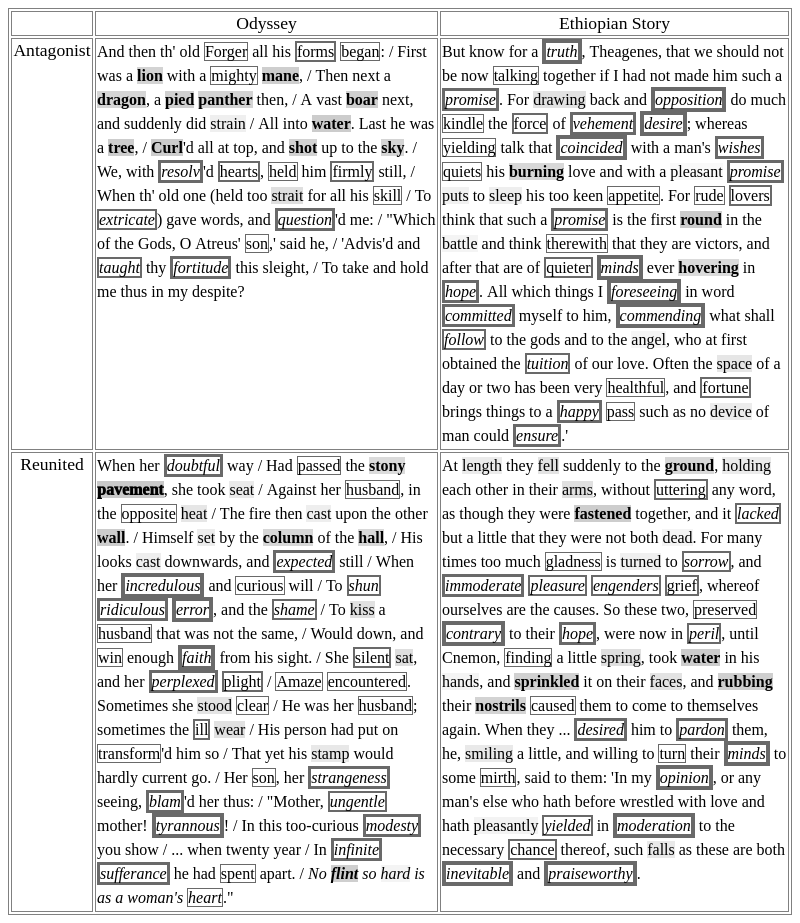

In [208]:
compare_psgs_table(psgdf)